# Distribuição diamétrica

Considere uma base de dados multinível em que:

- árvores entre 10 e 35 cm foram medidas em parcelas de 2x500 metros
- árvores iguais ou maiores que 35 cm foram medidas em parcelas de 20 x 500 metros.

Vamos calcular a distribuição diamétrica.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
inventario = pd.read_csv('https://raw.githubusercontent.com/Gorgens/treelab/master/manejo/inventarioMultinivelArea1.csv')
inventario.head()

,parcela,arvore,comum,cientifico,familia,dap2012,hcom,ht,vertical,luminosidade
0,T01,2,macucu,Licania guianensis,Chrysobalanaceae,10.3,4.59,7.83,S,2.0
1,T01,5,casca seca,Licania canescens,Chrysobalanaceae,14.6,9.16,10.27,S,2.0
2,T01,6,cajuacu,Anacardium spruceanum,Anacardiaceae,78.8,21.06,31.65,E,1.0
3,T01,7,breu branco,Protium paniculatum,Burseraceae,14.7,7.35,11.54,S,2.0
4,T01,9,breu branco,Protium paniculatum,Burseraceae,10.6,4.90,6.91,E,3.0


## Centro de classe

1. Definir intervalo de classe
2. Computar o centro de classe


In [ ]:
intervaloClasse = 10.0
diametroMin = 10.0
classeMax = ((max(inventario['dap2012']) // intervaloClasse) + 1) * intervaloClasse

intervalos = list(np.arange(diametroMin, classeMax, intervaloClasse))
intervalos = [(x - 0.001) for x in intervalos]

centros = [round(x + intervaloClasse/2.0, 0) for x in intervalos[:-1]]

inventario[inventario['dap2012'] >= diametroMin]
inventario['centroClasse'] = pd.cut(inventario['dap2012'], bins=intervalos, labels=centros)

## A questão do multinível

A comunidade é amostrada em duas fases:

- árvores entre 10 e 35 cm foram medidas em parcelas de 2x500 metros
- árvores iguais ou maiores que 35 cm foram medidas em parcelas de 20 x 500 metros.


In [ ]:
nivel1 = inventario[(inventario['dap2012'] < 35.0) & (inventario['dap2012'] > 10.0)]
nivel2 = inventario[inventario['dap2012'] >= 35.0]

In [ ]:
area1 = 10000.0 / 1000.0
freqDiam1 = nivel1[nivel1['comum'] != 'morta'].pivot_table(values = 'dap2012', index=['parcela'], columns=['centroClasse'], aggfunc='count', fill_value = 0)
freqDiam1 = freqDiam1.apply(lambda x: x * area1)

area2 = 10000.0 / 10000.0
freqDiam2 = nivel2[nivel2['comum'] != 'morta'].pivot_table(values = 'dap2012', index=['parcela'], columns=['centroClasse'], aggfunc='count', fill_value = 0)
freqDiam2 = freqDiam2.apply(lambda x: x * area2)

freqDiam1.loc[:,35.0] = freqDiam1.loc[:,35.0] + freqDiam2.loc[:,35.0]
freqDist = pd.concat([freqDiam1, freqDiam2.iloc[:,1:]], axis=1)
distDiam = freqDist.agg('mean', axis=0)

distDiam = distDiam.reset_index()
distDiam.columns = ['centroClasse', 'freqArv']

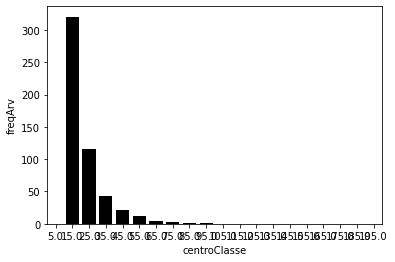

In [ ]:
ax = sns.barplot(x=distDiam['centroClasse'], y=distDiam['freqArv'], color='black')